# Exercício 1 - Rede Neural Low Level Regressão Linear
## Integrantes:
- Caio Catarino - 11810982
- Daniel Shimoda - 11811758
- Gabriel Zamith - 11810979
- Gustavo Luchetti - 11810745
- Luka Bomura - 11810893
- Pedro Malta - 11810781

In [151]:
import os 
os.environ['LD_LIBRARY_PATH'] = os.getcwd()

import tensorflow as tf
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Make numpy printouts easier to read.
tf.disable_v2_behavior()
np.set_printoptions(precision=3, suppress=True)
sns.set_style("darkgrid")

In [152]:
raw_dataset = pd.read_csv('provided_dataset.csv')

In [153]:
dataset = raw_dataset.copy()
dataset


,age,plan value
0,18,871
1,23,1132
2,28,1042
3,33,1356
4,38,1488
5,43,1638
6,48,1569
7,53,1754
8,58,1866
9,63,1900


In [154]:
#todo: convert pd dataframe into array of arrays
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)
scaled_y

array([[-1.758],
       [-0.981],
       [-1.249],
       [-0.314],
       [ 0.079],
       [ 0.525],
       [ 0.32 ],
       [ 0.87 ],
       [ 1.203],
       [ 1.305]])

<AxesSubplot:xlabel='age', ylabel='plan value'>

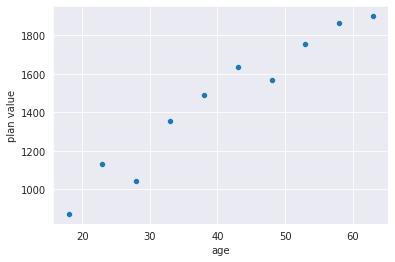

In [156]:
sns.scatterplot(data=dataset, x='age', y='plan value')

## Linear Regression ==> y = b0 + b1 * x

In [157]:
# np random seeds
np.random.seed(42)

In [158]:
b0 = tf.Variable(0.35)
b1 = tf.Variable(0.70)

In [159]:
loss_function = tf.losses.mean_squared_error(scaled_y, (b0 + b1 * scaled_X))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [160]:
training = optimizer.minimize(loss_function)
init = tf.global_variables_initializer()

In [161]:
epochs = 10000

with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        sess.run(training)
        
    b0_final, b1_final = sess.run([b0, b1])

In [162]:
print (b0_final, b1_final)

4.27272e-10 0.9711764


In [163]:
predictions = b0_final + b1_final * scaled_X
predictions

array([[-1.522],
       [-1.183],
       [-0.845],
       [-0.507],
       [-0.169],
       [ 0.169],
       [ 0.507],
       [ 0.845],
       [ 1.183],
       [ 1.522]])

In [164]:
correct_predictions = scaler.inverse_transform(predictions)

array([[ 950.299],
       [1063.921],
       [1177.544],
       [1291.166],
       [1404.789],
       [1518.411],
       [1632.034],
       [1745.656],
       [1859.279],
       [1972.901]])

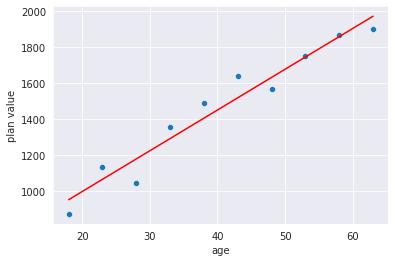

In [165]:
sns.scatterplot(data=dataset, x="age", y="plan value")
plt.plot(X, correct_predictions, color = 'red')

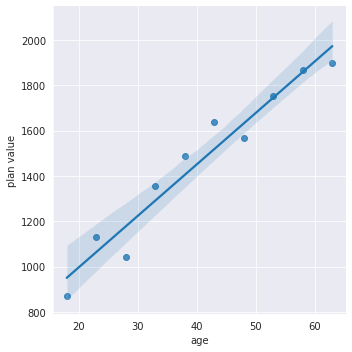

In [166]:
sns.lmplot(x='age', y='plan value', data=dataset)